In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
!pip install dython --user
from dython.nominal import associations, identify_nominal_columns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score, RocCurveDisplay, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
!pip install catboost
from catboost import CatBoostClassifier
!pip install imbalanced-learn
!pip install imblearn
# from imblearn.over_sampling import SMOTE
# from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
!pip install optuna
import optuna
pd.options.display.max_columns=None

C:\Users\Muarrikh Yazka\anaconda3\lib\site-packages\xgboost\compat.py:31: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
df_raw = pd.read_csv('data/internet_service_churn.csv')

In [3]:
df = df_raw.copy()

In [4]:
df.head()

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,NaN,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,27,0,0,6.87,21,NaN,1,0.0,0.0,0,1
4,34,0,0,6.39,0,NaN,0,0.0,0.0,0,1


In [5]:
df.shape

(72274, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72274 entries, 0 to 72273
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           72274 non-null  int64  
 1   is_tv_subscriber             72274 non-null  int64  
 2   is_movie_package_subscriber  72274 non-null  int64  
 3   subscription_age             72274 non-null  float64
 4   bill_avg                     72274 non-null  int64  
 5   reamining_contract           50702 non-null  float64
 6   service_failure_count        72274 non-null  int64  
 7   download_avg                 71893 non-null  float64
 8   upload_avg                   71893 non-null  float64
 9   download_over_limit          72274 non-null  int64  
 10  churn                        72274 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 6.1 MB


In [7]:
df.duplicated().sum()

0

In [8]:
df['id'].duplicated().sum()

0

<h3>EDA</h3>

<h4>Univariate Analysis</h4>

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,72274.0,846318.243462,489102.168744,15.00,422216.50,847784.00,1269562.00,1689744.00
is_tv_subscriber,72274.0,0.815259,0.388090,0.00,1.00,1.00,1.00,1.00
is_movie_package_subscriber,72274.0,0.334629,0.471864,0.00,0.00,0.00,1.00,1.00
subscription_age,72274.0,2.450051,2.034990,-0.02,0.93,1.98,3.30,12.80
bill_avg,72274.0,18.942483,13.215386,0.00,13.00,19.00,22.00,406.00
reamining_contract,50702.0,0.716039,0.697102,0.00,0.00,0.57,1.31,2.92
service_failure_count,72274.0,0.274234,0.816621,0.00,0.00,0.00,0.00,19.00
download_avg,71893.0,43.689911,63.405963,0.00,6.70,27.80,60.50,4415.20
upload_avg,71893.0,4.192076,9.818896,0.00,0.50,2.10,4.80,453.30
download_over_limit,72274.0,0.207613,0.997123,0.00,0.00,0.00,0.00,7.00


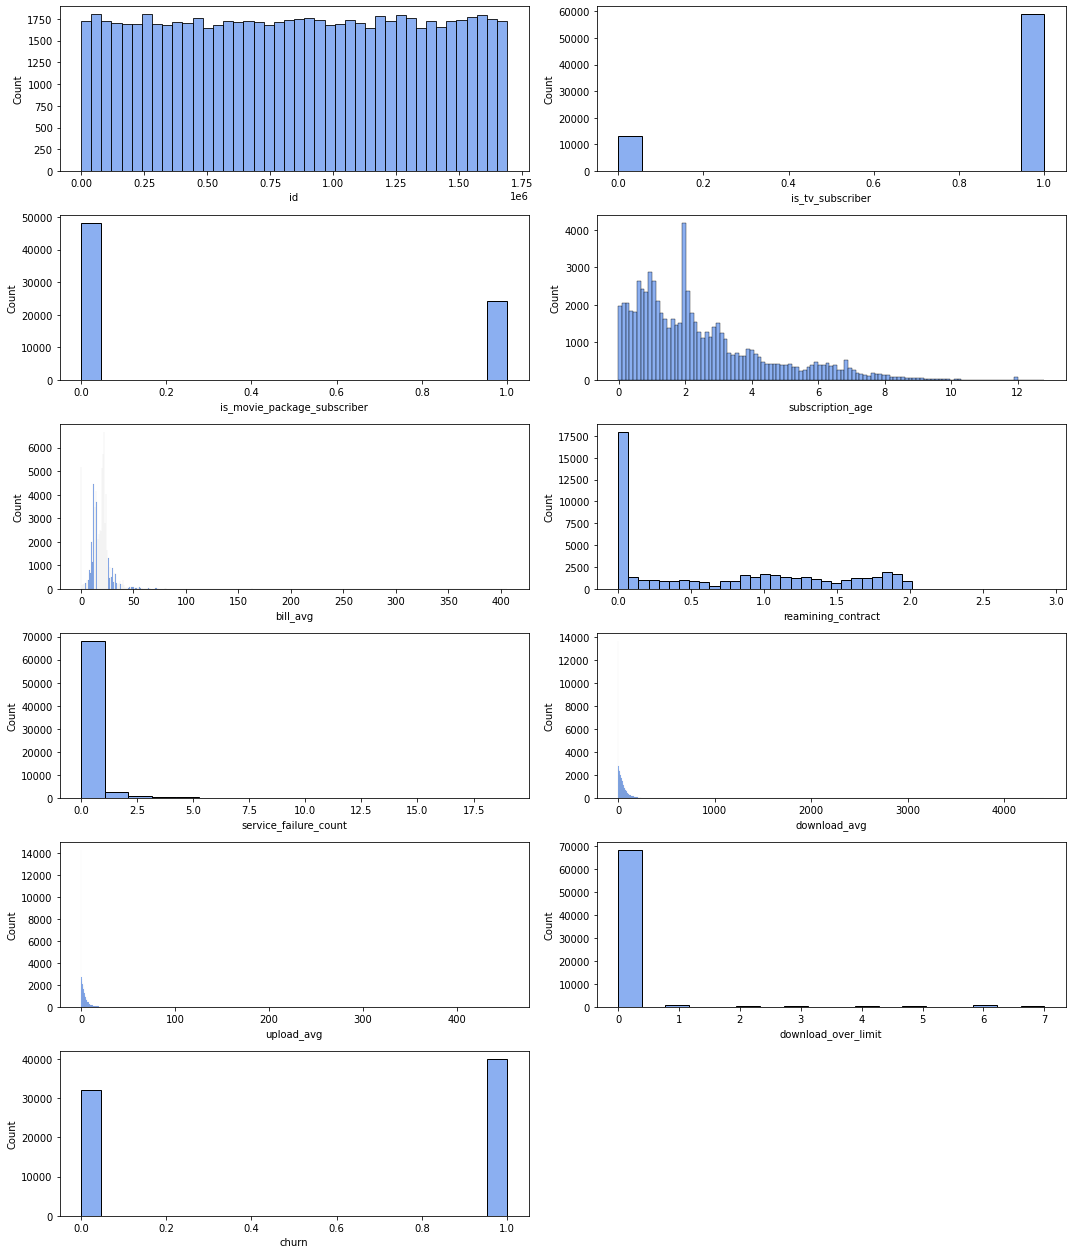

In [10]:
num = list(df.describe().columns)
plt.figure(figsize=(15, 20))
for i in range(0, len(num)):
    plt.subplot(7, 2, i+1)
    sns.histplot(x=df[num[i]], color='cornflowerblue')
    plt.xlabel(num[i])
    plt.tight_layout()

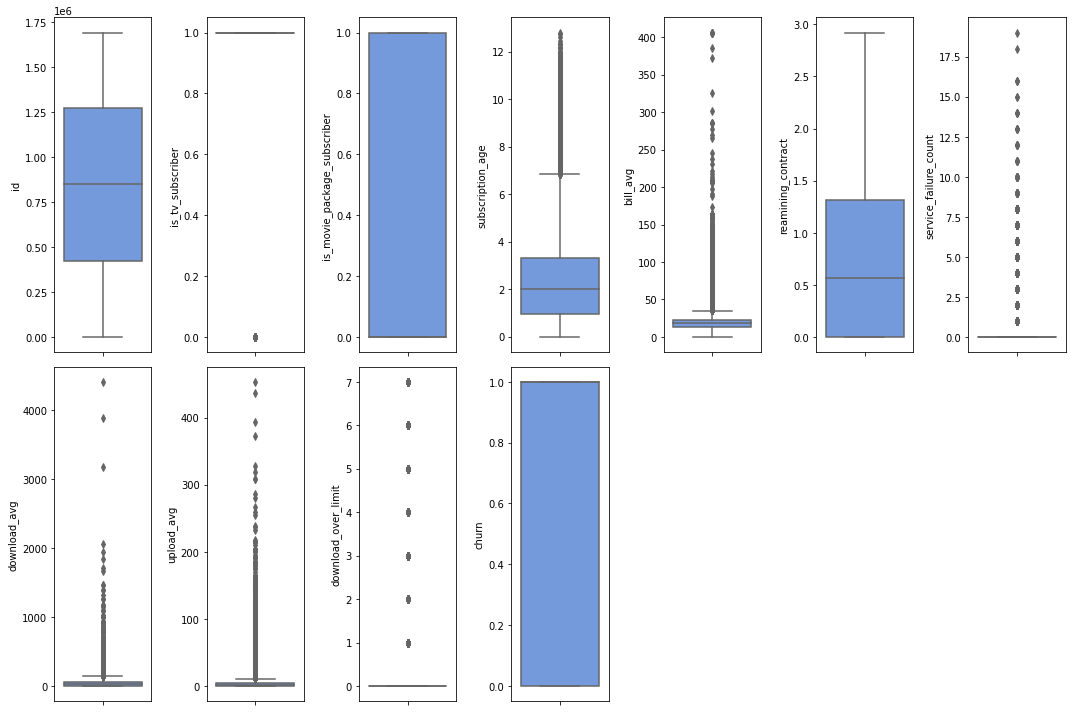

In [11]:
num = list(df.describe().columns)
plt.figure(figsize=(15,10))
for i in range(0, len(num)):
    plt.subplot(2, 7, i+1)
    sns.boxplot(y=df[num[i]], color='cornflowerblue', orient='v')
    plt.tight_layout()

<h3>Target Analysis</h3>

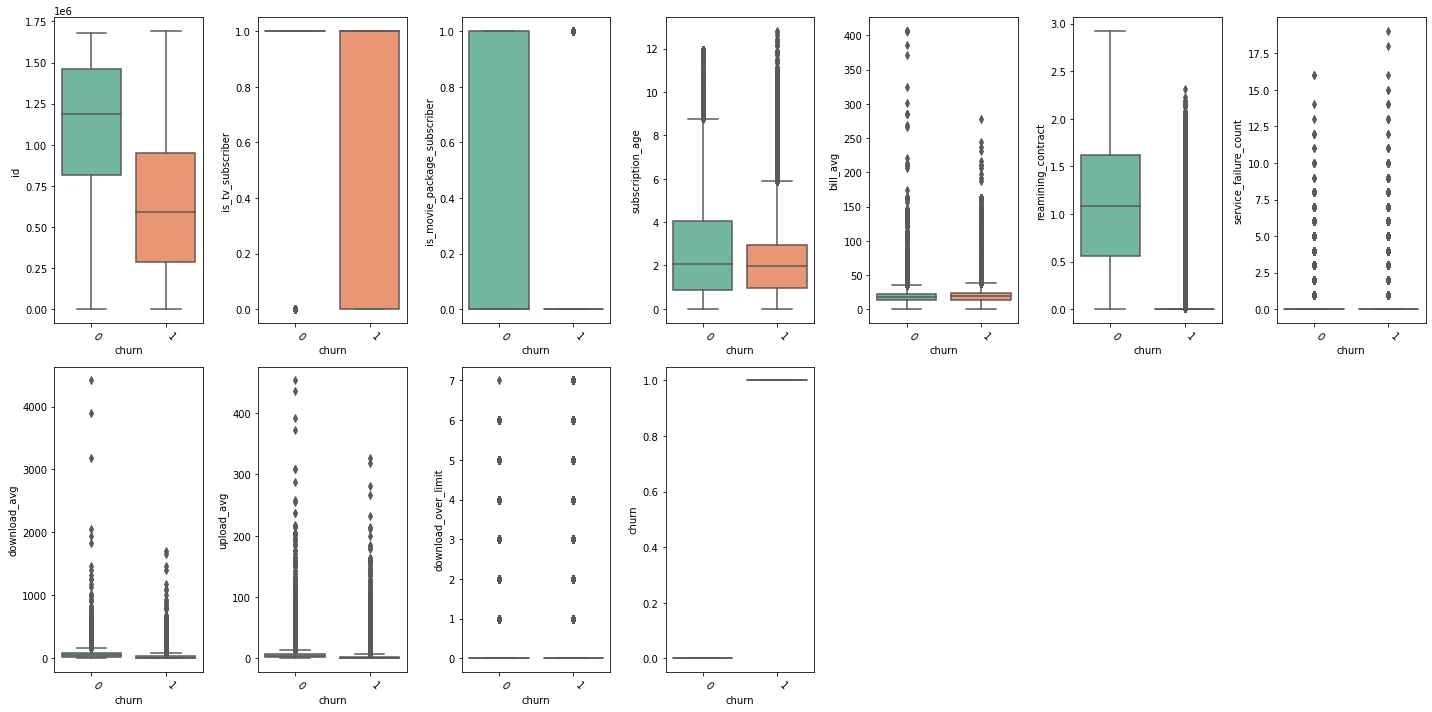

In [12]:
num = list(df.describe().columns)
plt.figure(figsize=(20,10))
for i in range(0, len(num)):
    plt.subplot(2, 7, i+1)
    sns.boxplot(y=df[num[i]], orient='v', x=df['churn'], palette="Set2")
    plt.xticks(rotation=-45, ha='left')
    plt.tight_layout()

<ipython-input-13-96d009b22f19>:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x=df[num[i]], palette="Set2", hue=df_raw['churn'])


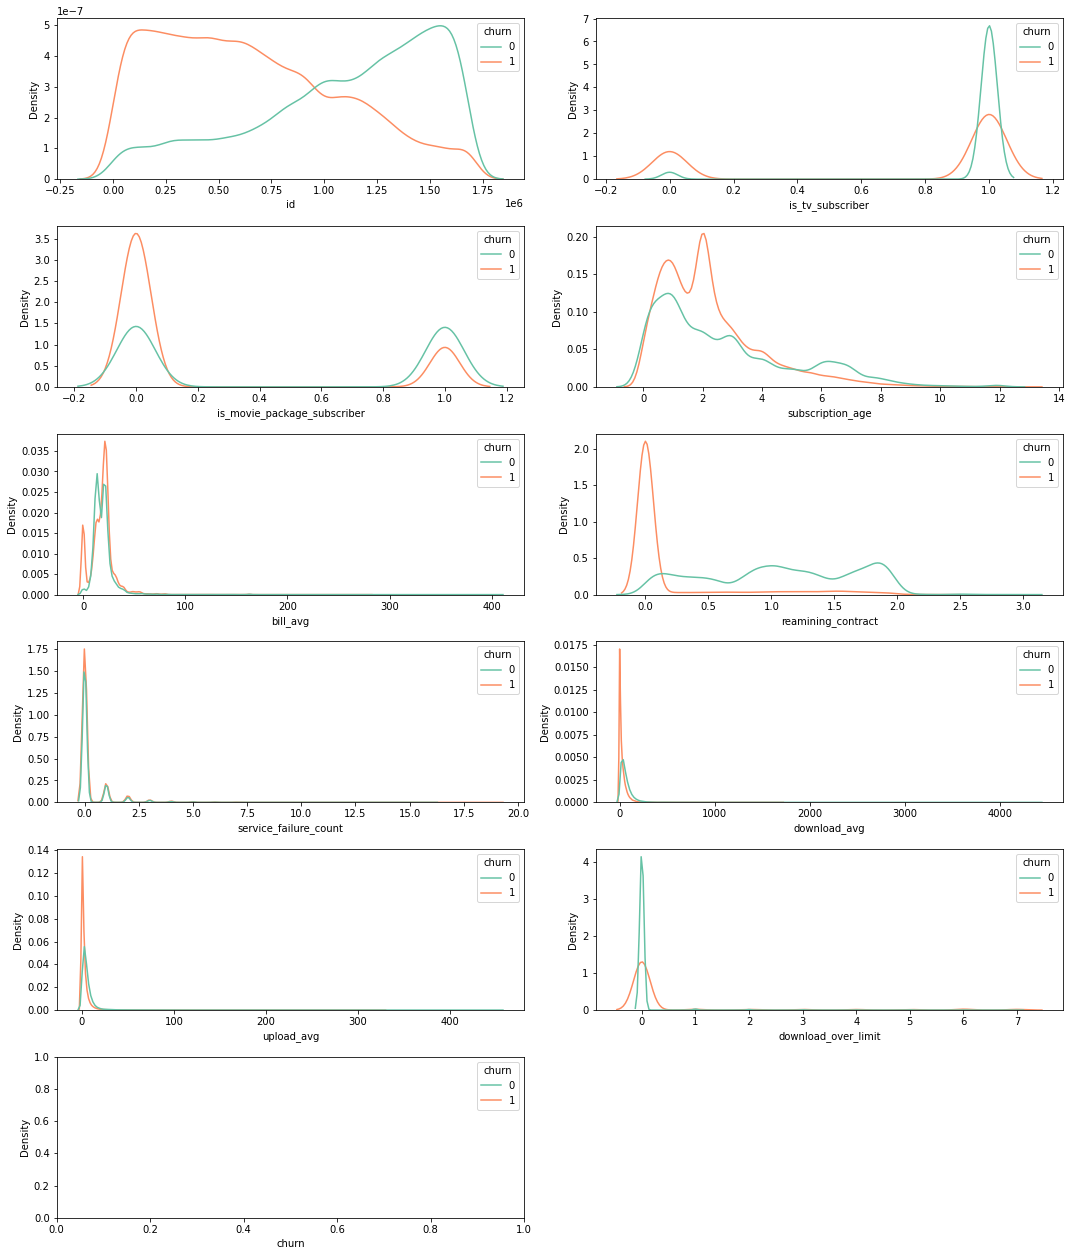

In [13]:
num = list(df.describe().columns)
plt.figure(figsize=(15, 20))
for i in range(0, len(num)):
    plt.subplot(7, 2, i+1)
    sns.kdeplot(x=df[num[i]], palette="Set2", hue=df_raw['churn'])
    plt.xlabel(num[i])
    plt.tight_layout()

<Figure size 1080x1080 with 0 Axes>

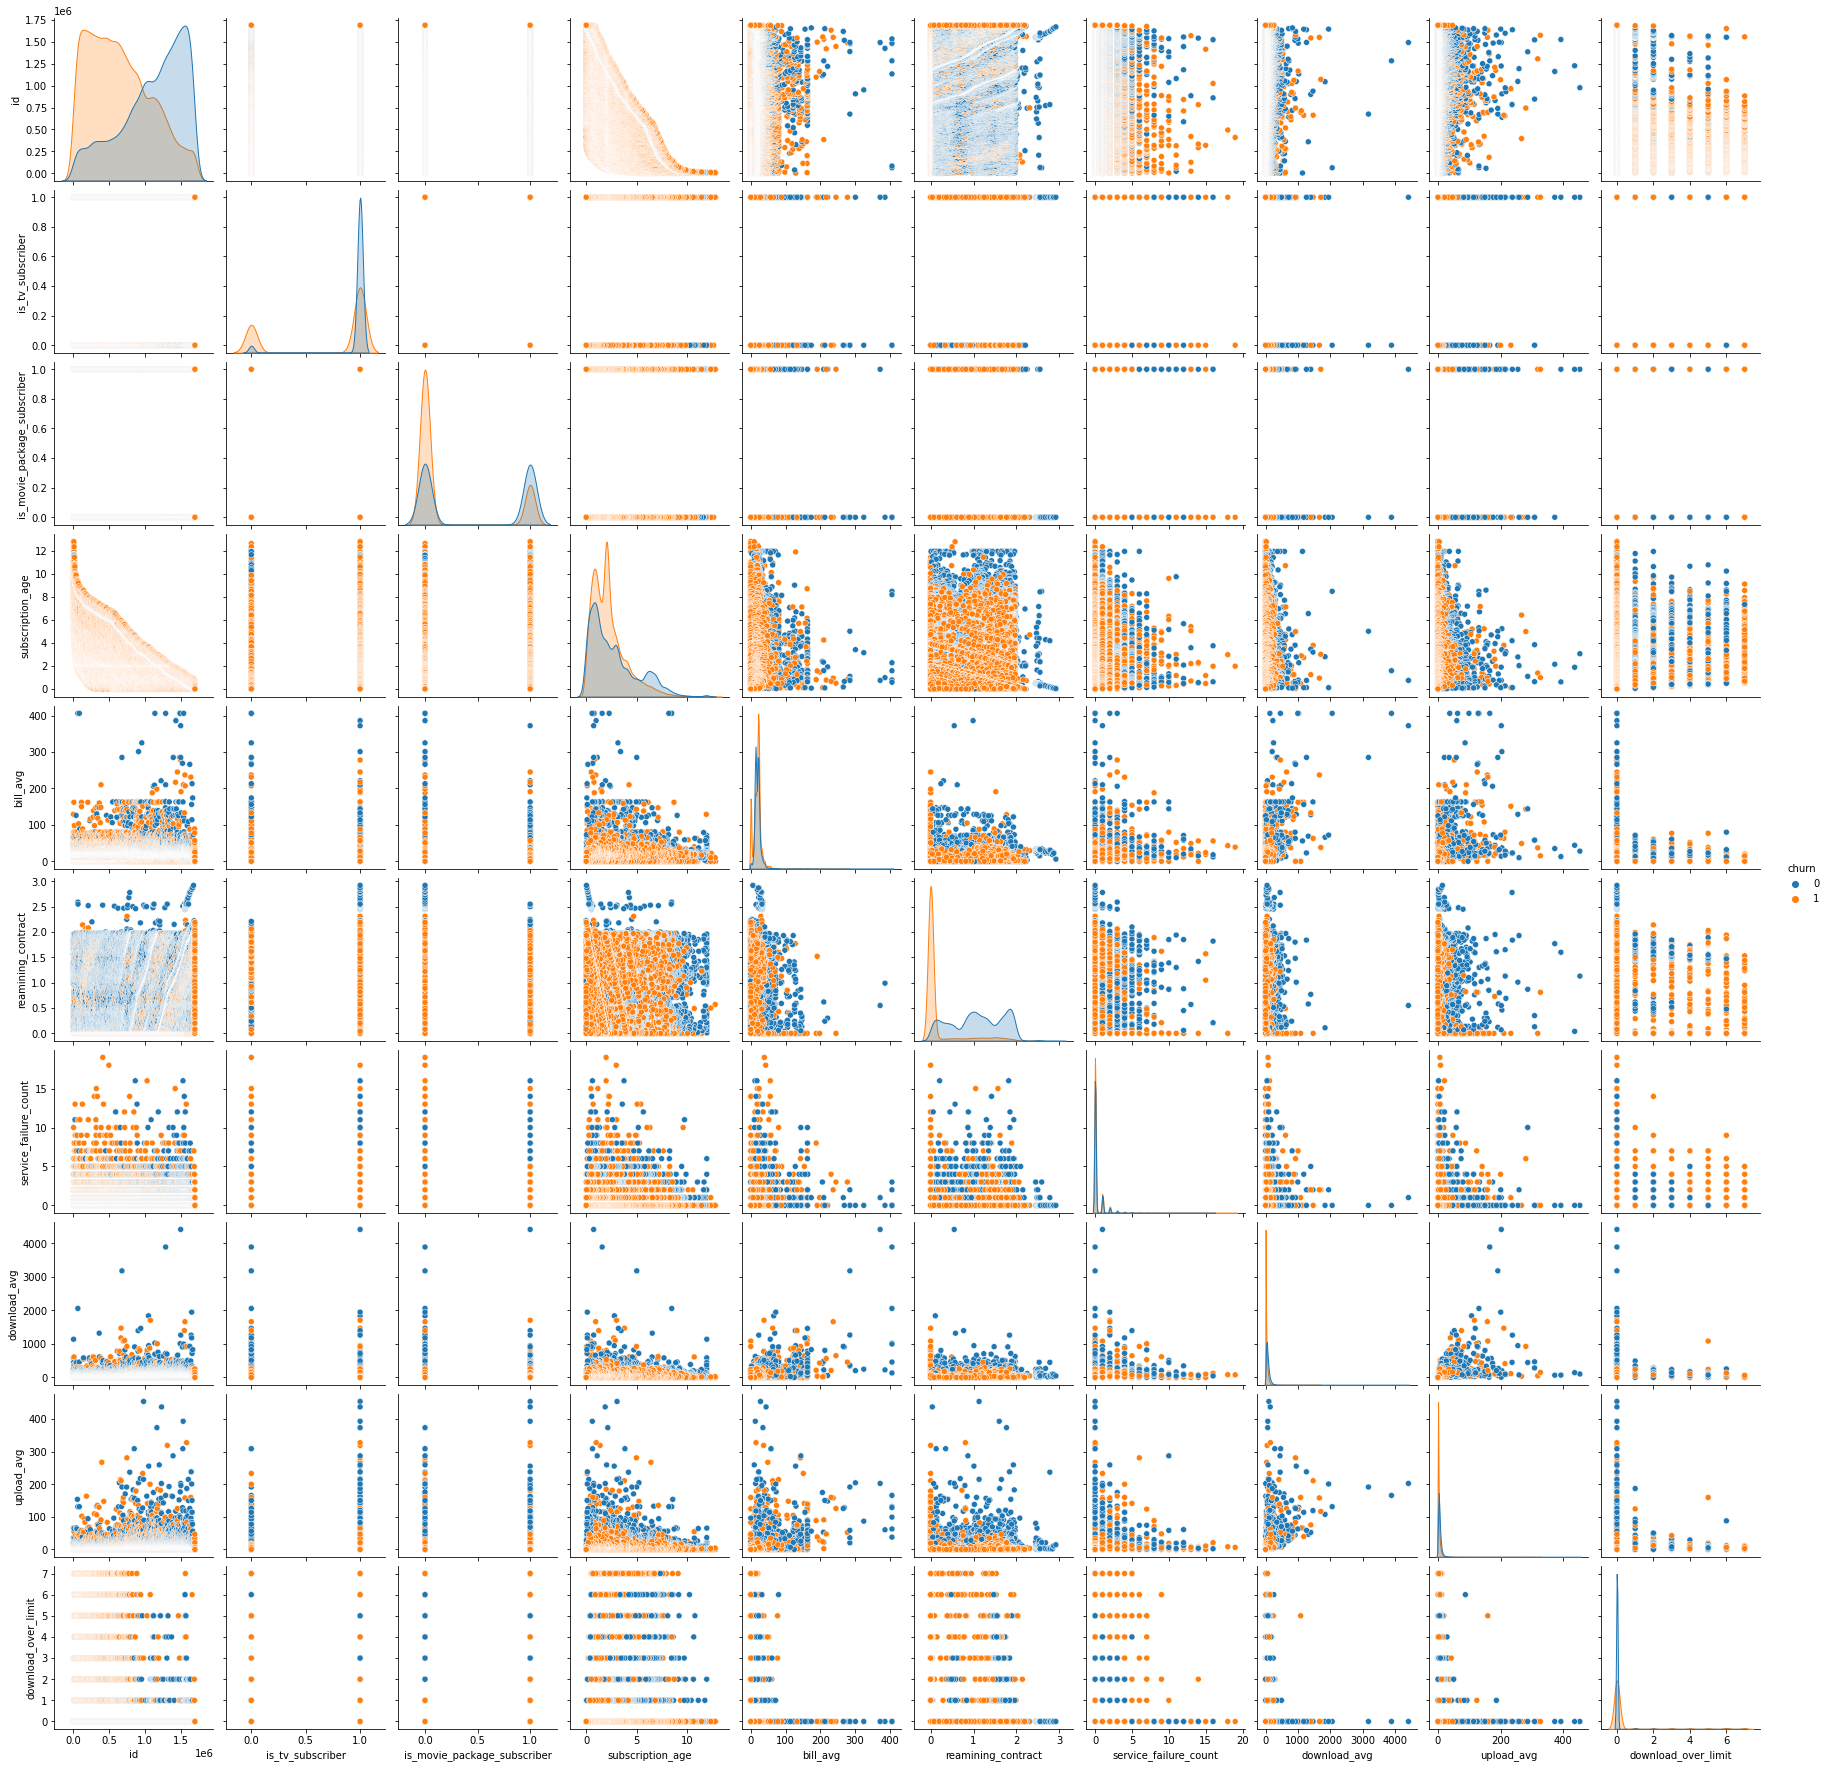

In [14]:
plt.figure(figsize=(15, 15))
sns.pairplot(df, diag_kind='kde', hue='churn')

<Axes: >

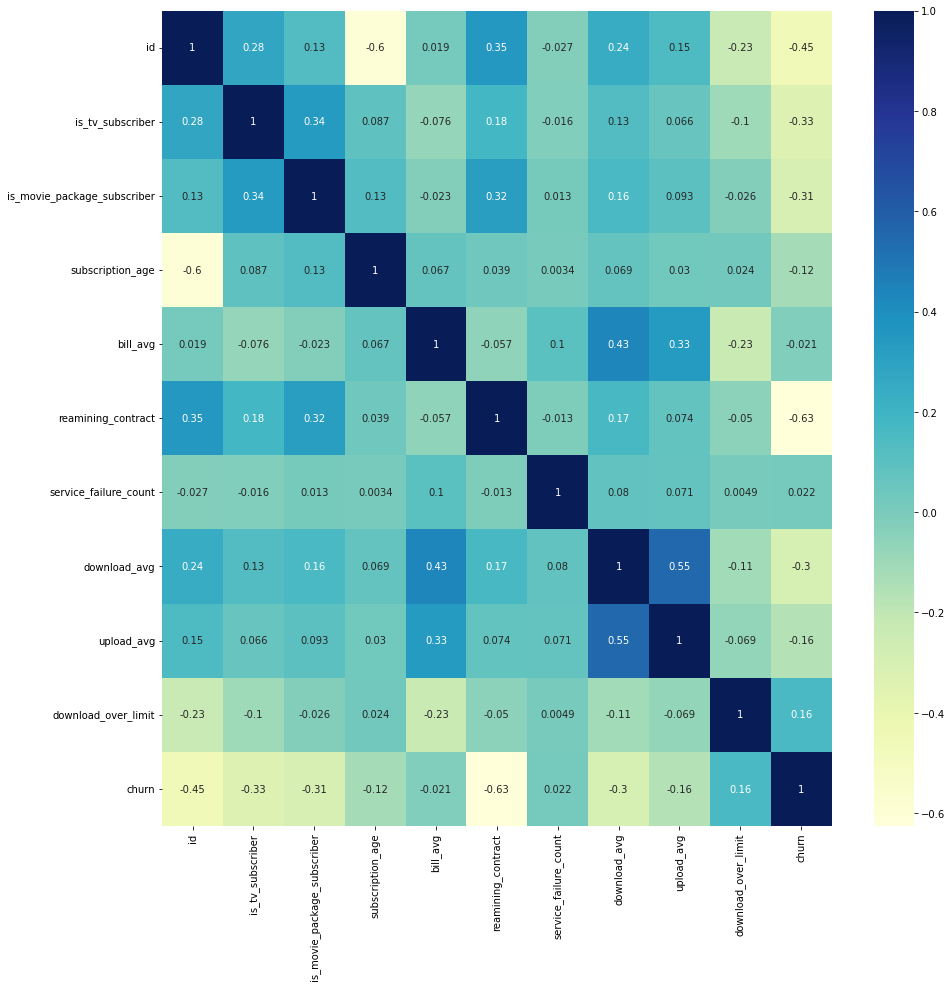

In [15]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

<h3>Check Missing Value</h3>

In [16]:
## Check Missing Value
def check_missing_value(df): 
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    missing_data = missing_data.loc[missing_data['Percent']>0]
    if missing_data.shape[0]!=0:
        return missing_data
    else:
        print('Tidak ada missing value!!!')
        
check_missing_value(df)

,Total,Percent
reamining_contract,21572,0.298475
download_avg,381,0.005272
upload_avg,381,0.005272


In [17]:
df = df.fillna(0)

<h3>Modelling</h3>

In [18]:
df_final = df.drop('id', axis=1).copy()
y = df_final.loc[:,'churn']
x = df_final.loc[:, df_final.columns!='churn']

In [19]:
## split train and test
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size= 0.2, random_state=42, stratify=y)
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((57819, 9), (14455, 9), (57819,), (14455,))

In [20]:
## standardizing
sc = StandardScaler()
xtrain_sc = sc.fit_transform(xtrain)
xtest_sc = sc.transform(xtest)

In [21]:
## check whether need oversampling or undersampling
counter = Counter(ytrain)
print(counter)

Counter({1: 32040, 0: 25779})


In [22]:
%%time
logreg = LogisticRegression(random_state=42)
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
xg = XGBClassifier(use_label_encoder=False)
cb = CatBoostClassifier(random_state=42, silent=True)

model = [logreg, knn, dt, rf, xg, cb]
me_sum = pd.DataFrame({'model':[],'accuracytrain':[],'accuracytest':[],'precision':[],'recall':[],'rocauc':[]})

for i in model:
    i.fit(xtrain_sc, ytrain)
    ytrainpredict = i.predict(xtrain_sc)
    ytestpredict = i.predict(xtest_sc)
    accuracytrain = round(accuracy_score(ytrain, ytrainpredict),3)
    accuracytest = round(accuracy_score(ytest, ytestpredict),3)
    precision = round(precision_score(ytest, ytestpredict),3)
    recall = round(recall_score(ytest, ytestpredict),3)
    rocauc = round(roc_auc_score(ytest, ytestpredict),3)
    name = f'{i}'.split('(')[0]
    me_sum = me_sum.append({'model':name, 
                            'accuracytrain':accuracytrain,
                            'accuracytest':accuracytest,
                            'precision':precision,
                            'recall':recall,
                            'rocauc':rocauc
                           }, ignore_index=True)
    print(name)
    print(classification_report(ytest, ytestpredict))
me_sum

LogisticRegression
              precision    recall  f1-score   support

           0       0.89      0.82      0.85      6445
           1       0.86      0.91      0.89      8010

    accuracy                           0.87     14455
   macro avg       0.87      0.87      0.87     14455
weighted avg       0.87      0.87      0.87     14455



<timed exec>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


KNeighborsClassifier
              precision    recall  f1-score   support

           0       0.89      0.90      0.90      6445
           1       0.92      0.91      0.91      8010

    accuracy                           0.91     14455
   macro avg       0.90      0.91      0.91     14455
weighted avg       0.91      0.91      0.91     14455



<timed exec>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      6445
           1       0.91      0.91      0.91      8010

    accuracy                           0.90     14455
   macro avg       0.90      0.90      0.90     14455
weighted avg       0.90      0.90      0.90     14455



<timed exec>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


RandomForestClassifier
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      6445
           1       0.95      0.94      0.94      8010

    accuracy                           0.94     14455
   macro avg       0.94      0.94      0.94     14455
weighted avg       0.94      0.94      0.94     14455

[19:53:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<timed exec>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


XGBClassifier
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      6445
           1       0.95      0.94      0.95      8010

    accuracy                           0.94     14455
   macro avg       0.94      0.94      0.94     14455
weighted avg       0.94      0.94      0.94     14455

              precision    recall  f1-score   support

           0       0.93      0.94      0.93      6445
           1       0.95      0.94      0.95      8010

    accuracy                           0.94     14455
   macro avg       0.94      0.94      0.94     14455
weighted avg       0.94      0.94      0.94     14455

Wall time: 45 s


<timed exec>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


,model,accuracytrain,accuracytest,precision,recall,rocauc
0,LogisticRegression,0.872,0.872,0.862,0.915,0.866
1,KNeighborsClassifier,0.926,0.906,0.922,0.908,0.906
2,DecisionTreeClassifier,1.000,0.903,0.915,0.909,0.902
3,RandomForestClassifier,1.000,0.940,0.954,0.936,0.940
4,XGBClassifier,0.954,0.940,0.954,0.938,0.941
5,<catboost.core.CatBoostClassifier object at 0x...,0.950,0.941,0.954,0.940,0.942


<h3>Hyperparameter Tuning</h3>

In [23]:
def objective(trial):
    train_x, valid_x, train_y, valid_y = train_test_split(x, y, test_size=0.3)

    param = {
        "objective": trial.suggest_categorical("objective", ["Logloss", "CrossEntropy"]),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.01, 0.1),
        "depth": trial.suggest_int("depth", 1, 12),
        "boosting_type": trial.suggest_categorical("boosting_type", ["Ordered", "Plain"]),
        "bootstrap_type": trial.suggest_categorical(
            "bootstrap_type", ["Bayesian", "Bernoulli", "MVS"]
        ),
        "used_ram_limit": "3gb",
    }

    if param["bootstrap_type"] == "Bayesian":
        param["bagging_temperature"] = trial.suggest_float("bagging_temperature", 0, 10)
    elif param["bootstrap_type"] == "Bernoulli":
        param["subsample"] = trial.suggest_float("subsample", 0.1, 1)

    gbm = CatBoostClassifier(**param)

    gbm.fit(train_x, train_y, eval_set=[(valid_x, valid_y)], verbose=0, early_stopping_rounds=100)

    preds = gbm.predict(valid_x)
    pred_labels = np.rint(preds)
    accuracy = accuracy_score(valid_y, pred_labels)
    return accuracy




In [ ]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50, timeout=600)

[I 2023-03-06 19:53:27,823] A new study created in memory with name: no-name-81c6c2c1-bd7c-435a-ade2-a2889403d633
C:\Users\Muarrikh Yazka\anaconda3\lib\site-packages\catboost\core.py:1135: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, feature_names, thread_count)
[I 2023-03-06 19:53:43,920] Trial 0 finished with value: 0.9322510722685975 and parameters: {'objective': 'CrossEntropy', 'colsample_bylevel': 0.03468811463767366, 'depth': 6, 'boosting_type': 'Ordered', 'bootstrap_type': 'MVS'}. Best is trial 0 with value: 0.9322510722685975.
C:\Users\Muarrikh Yazka\anaconda3\lib\site-packages\catboost\core.py:1135: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_fea

C:\Users\Muarrikh Yazka\anaconda3\lib\site-packages\catboost\core.py:1135: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, feature_names, thread_count)
[I 2023-03-06 19:56:03,314] Trial 12 finished with value: 0.9332656920167873 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.052067115951976405, 'depth': 12, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian', 'bagging_temperature': 1.7079702479296888}. Best is trial 9 with value: 0.9368168611354517.
C:\Users\Muarrikh Yazka\anaconda3\lib\site-packages\catboost\core.py:1135: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weigh

C:\Users\Muarrikh Yazka\anaconda3\lib\site-packages\catboost\core.py:1135: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, feature_names, thread_count)
[I 2023-03-06 19:58:28,220] Trial 24 finished with value: 0.9362634321818937 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.09013625896213655, 'depth': 4, 'boosting_type': 'Plain', 'bootstrap_type': 'Bernoulli', 'subsample': 0.808129307245232}. Best is trial 20 with value: 0.9394456486648527.
C:\Users\Muarrikh Yazka\anaconda3\lib\site-packages\catboost\core.py:1135: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline

[I 2023-03-06 20:00:54,507] Trial 36 finished with value: 0.9372780519300835 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.09470318555348864, 'depth': 6, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS'}. Best is trial 20 with value: 0.9394456486648527.
C:\Users\Muarrikh Yazka\anaconda3\lib\site-packages\catboost\core.py:1135: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, feature_names, thread_count)
[I 2023-03-06 20:01:04,739] Trial 37 finished with value: 0.9324816676659133 and parameters: {'objective': 'CrossEntropy', 'colsample_bylevel': 0.08480677077567211, 'depth': 4, 'boosting_type': 'Plain', 'bootstrap_type': 'Bernoulli', 'subsample': 0.9100495898154155}. Best is trial 20 with value: 0.9394456486648527.
C:\Users\Muarrikh Yazka\anaconda3\lib\site-package

In [ ]:
print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))